Image preprocessing

In [46]:
import numpy as np
import cv2 as cv
import imutils
import tensorflow as tf
import os
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore")

data = []
labels = []

datagen = ImageDataGenerator (
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    brightness_range=(0.8, 1.2),
)

imagePaths = sorted(list(paths.list_images('./data/train/')))
print(f'Total image paths: {len(imagePaths)}')
for imagePath in imagePaths:
    image = cv.imread(imagePath)
    image = cv.resize(image, (224,224))
    image = img_to_array(image)
    data.append(image)
    label = os.path.basename(imagePath)
    #label = imagePath.split(os.path.sep)
    labels.append(label)
'''
for i in range(len(labels)):
    gesture = labels[i]
    gesture = gesture[5:]
    labels[i] = gesture
'''
data = np.array(data, dtype = "float32") / 255.0
print(f'Total images processed: {len(data)}')
labels = np.array(labels, dtype = "str")
datagen.fit(data)

Total image paths: 12
Total images processed: 12


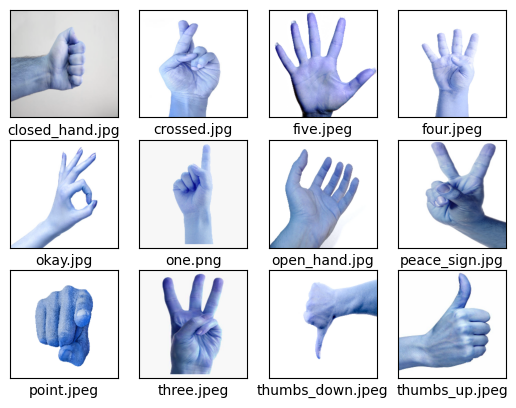

In [47]:
import matplotlib.pyplot as plt

for i in range(len(data)) :
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])

plt.show()

mlb = LabelEncoder()
labels2 = mlb.fit_transform(labels)

Convolutional Neural Network implementation

In [58]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(12, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 26, 26, 64)      

In [59]:
model.fit(data, labels2, epochs=12, batch_size=12, verbose = 1)

Epoch 1/12
1/1 [==============================] - 1s 840ms/step - loss: 2.4993 - accuracy: 0.0833
Epoch 2/12
1/1 [==============================] - 0s 115ms/step - loss: 3.3038 - accuracy: 0.1667
Epoch 3/12
1/1 [==============================] - 0s 120ms/step - loss: 2.5384 - accuracy: 0.0833
Epoch 4/12
1/1 [==============================] - 0s 95ms/step - loss: 2.4775 - accuracy: 0.0833
Epoch 5/12
1/1 [==============================] - 0s 117ms/step - loss: 2.4616 - accuracy: 0.0833
Epoch 6/12
1/1 [==============================] - 0s 117ms/step - loss: 2.4496 - accuracy: 0.0833
Epoch 7/12
1/1 [==============================] - 0s 99ms/step - loss: 2.4172 - accuracy: 0.4167
Epoch 8/12
1/1 [==============================] - 0s 117ms/step - loss: 2.3656 - accuracy: 0.4167
Epoch 9/12
1/1 [==============================] - 0s 118ms/step - loss: 2.2716 - accuracy: 0.6667
Epoch 10/12
1/1 [==============================] - 0s 101ms/step - loss: 2.1534 - accuracy: 0.7500
Epoch 11/12
1/1 [====